In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
student_scores = pd.read_csv('datasets/student_performance.csv')

student_scores.sample(5)

,Hours Studied,Score Obtained,Outliers
28,214,8.076486,False
52,420,50.999867,False
6,68,1.500874,False
14,110,80.000000,True
31,228,81.000000,True


In [5]:
student_scores.shape

(122, 3)

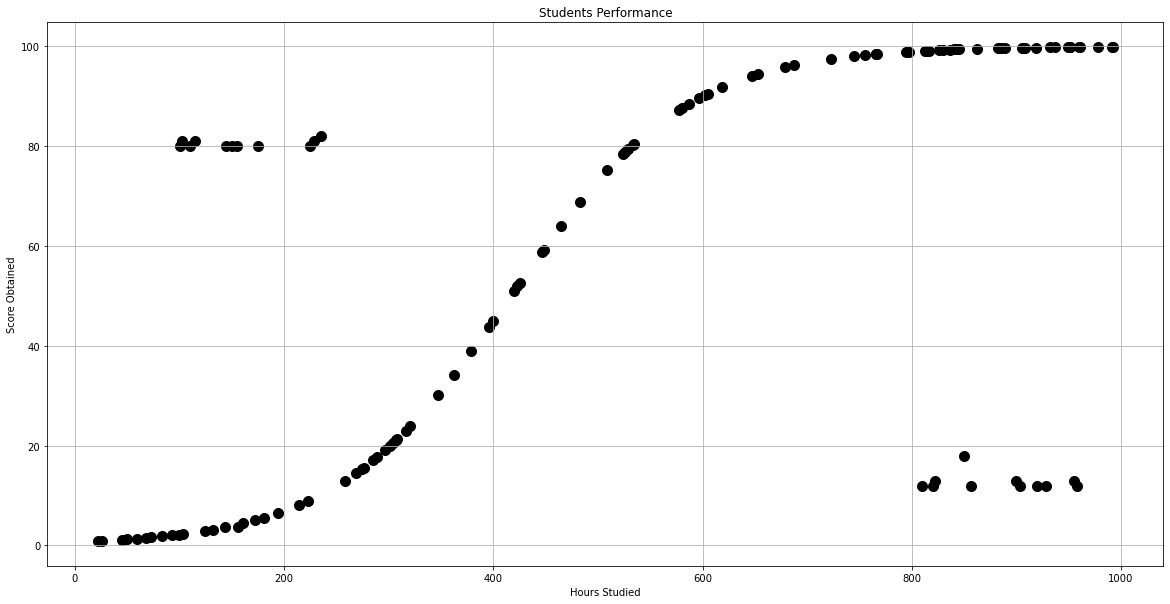

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.scatter(student_scores['Hours Studied'],
           student_scores['Score Obtained'],
           color='black',
           s=100)

ax.set(xlabel='Hours Studied',
      ylabel='Score Obtained',
      title='Students Performance')

ax.grid()

plt.show()

In [7]:
student_scores.groupby('Outliers').size()

Outliers
False    100
True      22
dtype: int64

In [8]:
X = student_scores.drop('Outliers', axis=1)

X.head()

,Hours Studied,Score Obtained
0,22,0.869736
1,26,0.912112
2,45,1.143020
3,46,1.156660
4,50,1.212843


In [10]:
from sklearn.neighbors import LocalOutlierFactor

In [12]:
lof = LocalOutlierFactor(n_neighbors=20,
                        contamination=0.2)

In [13]:
y_pred = lof.fit_predict(X)

y_pred

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1])

In [16]:
n_outliers = (y_pred == -1).sum()

n_outliers

25

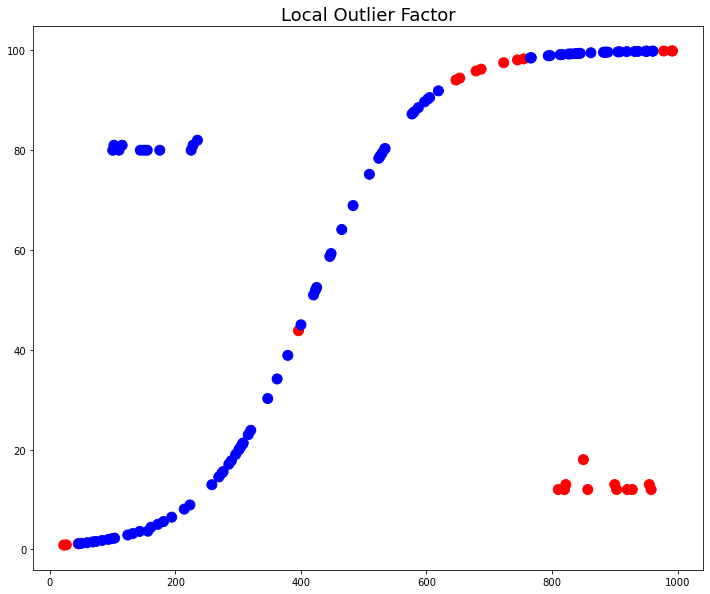

In [17]:
colors = np.array(['r', 'b'])

plt.figure(figsize=(12, 10))

plt.title('Local Outlier Factor', size=18)

plt.scatter(student_scores['Hours Studied'],
           student_scores['Score Obtained'],
           s=100,
           color=colors[(y_pred + 1) // 2])

plt.show()

In [18]:
X_scores = lof.negative_outlier_factor_

X_scores

array([-1.14317945, -1.12665573, -1.0567161 , -1.05368781, -1.04373738,
       -1.02975328, -1.02410918, -1.02484211, -1.02727546, -1.02988938,
       -1.03039928, -0.98395541, -0.97939208, -1.01269424, -0.96696018,
       -0.96737591, -0.99460791, -0.97612705, -0.95809487, -1.01195749,
       -1.01531276, -1.02251399, -0.95511057, -0.95961389, -0.96145326,
       -1.02771782, -0.96891175, -0.97850146, -0.98619115, -0.99666125,
       -0.99361717, -0.99170612, -0.99282767, -1.0128736 , -1.00195489,
       -1.00102812, -1.00025359, -0.9905836 , -0.98924894, -0.97888615,
       -0.97709147, -0.97796595, -0.98004792, -0.98004792, -0.98118573,
       -0.98656031, -0.98884869, -1.01038906, -1.04174962, -1.04964314,
       -1.05547725, -1.04610136, -1.03406249, -1.01951322, -1.02146054,
       -1.03259426, -1.01717545, -1.02345066, -1.02929812, -1.03763217,
       -1.02886507, -1.02886507, -1.030146  , -1.03107404, -1.03100017,
       -1.02456492, -1.02425818, -1.02938883, -1.04024032, -1.04

In [19]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) 

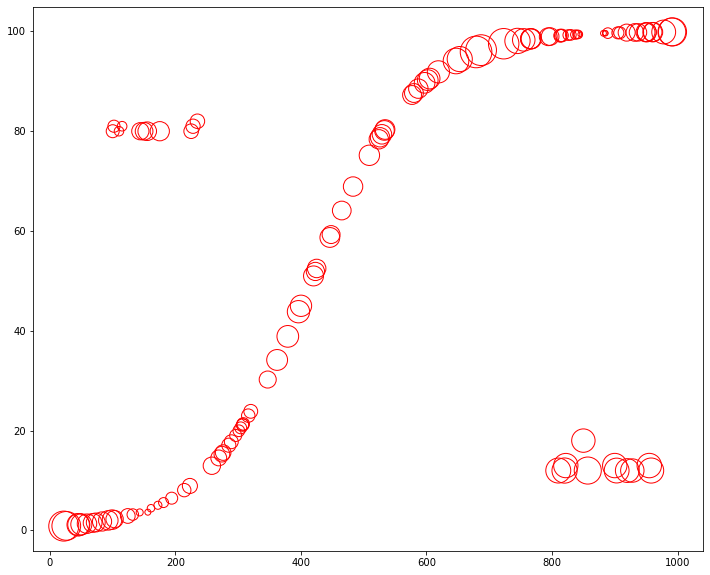

In [21]:
plt.figure(figsize=(12, 10))

plt.scatter(student_scores['Hours Studied'],
           student_scores['Score Obtained'],
           s=1000 * radius,
           edgecolors='r',
           facecolors='none',
           label='Outlier scores')

plt.show()